CONNECT TO DUCKDB TO PYTHON

In [21]:
import duckdb

with duckdb.connect("database/jokes.duckdb") as conn:
    conn.sql("DROP TABLE IF EXISTS jokes;")
    conn.sql("""--sql
        CREATE TABLE IF NOT EXISTS jokes (
            id INT,
            joke STRING
    );
""")

    conn.sql("""--sql
        INSERT INTO jokes VALUES
            (1, 'Why do programmers hate sunlight, because they attract bugs'),
            (2, 'Why do java programmers need glasses, because they cannot C#');
    """)

    desc = conn.sql("DESC;").df()



In [22]:
desc

,database,schema,name,column_names,column_types,temporary
0,jokes,main,jokes,"[id, joke]","[INTEGER, VARCHAR]",False


In [23]:
with duckdb.connect("database/jokes.duckdb") as conn:
    jokes = conn.sql("FROM jokes;").df()
#  outside -> connection is closed
# but have saved dataframe to jokes variable
jokes

,id,joke
0,1,"Why do programmers hate sunlight, because they..."
1,2,"Why do java programmers need glasses, because ..."


In [24]:
jokes["joke"]

0    Why do programmers hate sunlight, because they...
1    Why do java programmers need glasses, because ...
Name: joke, dtype: object

# Ingest a csv file into duckdb
- we can open a csv file without a database connection

In [25]:
# same as pd.read_csv()
finance = duckdb.sql("FROM 'data/financial_data.csv'").df()
finance.head()

,transaction_id,date,company,transaction_type,category,amount,currency,account_number,description,status,payment_method,tax_amount,net_amount
0,TXN1000,2024-01-15,UnitedHealth Group,Investment,Marketing,498789.60,JPY,ACC90616,Q1 revenue for r&d,Completed,Check,15640.11,483149.49
1,TXN1001,2024-12-22,Broadcom Inc,Expense,Administrative,407890.44,GBP,ACC72475,Q4 capital gain for it,Completed,Wire Transfer,25883.85,382006.59
2,TXN1002,2024-10-11,Starbucks,Capital Gain,Operations,363927.61,USD,ACC26222,Q3 expense for administrative,Pending,ACH,24814.56,339113.05
3,TXN1003,2024-09-30,Lockheed Martin,Dividend,R&D,336378.01,EUR,ACC86805,Q4 investment for marketing,Completed,Check,46359.17,290018.84
4,TXN1004,2024-07-02,IBM Corp,Operating Cost,Administrative,193284.51,GBP,ACC72617,Q2 expense for distribution,Completed,Credit Card,41529.35,151755.16


In [26]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    50 non-null     object        
 1   date              50 non-null     datetime64[us]
 2   company           50 non-null     object        
 3   transaction_type  50 non-null     object        
 4   category          50 non-null     object        
 5   amount            50 non-null     float64       
 6   currency          50 non-null     object        
 7   account_number    50 non-null     object        
 8   description       50 non-null     object        
 9   status            50 non-null     object        
 10  payment_method    50 non-null     object        
 11  tax_amount        50 non-null     float64       
 12  net_amount        50 non-null     float64       
dtypes: datetime64[us](1), float64(3), object(9)
memory usage: 5.2+ KB


In [27]:
finance["category"].value_counts()

category
Operations        8
Legal             6
Sales             5
Administrative    5
HR                5
Distribution      5
IT                5
Marketing         4
R&D               4
Manufacturing     3
Name: count, dtype: int64

SQL query directly on a dataframe

In [28]:
df_category_amount = duckdb.sql("""--sql
    SELECT
        category,
        SUM(amount) AS total_amount
    FROM finance
    GROUP BY category
    ORDER BY total_amount DESC
    """).df()

df_category_amount


,category,total_amount
0,Operations,2516205.96
1,Administrative,1524607.15
2,Marketing,1434237.33
3,IT,1272719.86
4,Distribution,1266188.51
5,R&D,1223866.29
6,Manufacturing,1140503.86
7,Sales,1086062.70
8,Legal,923504.37
9,HR,301675.46


<Axes: title={'center': 'Total amount per category'}, xlabel='category', ylabel='total_amount'>

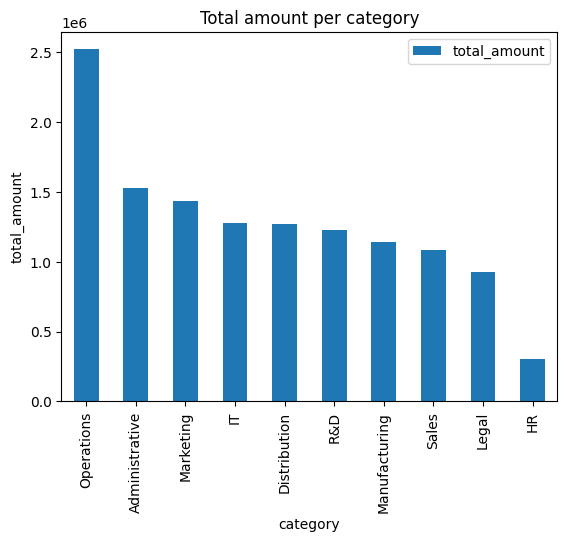

In [ ]:
df_category_amount.plot(
    x="category", 
    y="total_amount", 
    kind="bar", 
    title="Total amount per category", 
    xlabel="category", 
    ylabel="total_amount"
)

Read several csv files
- only read the hotel_bookings and nothing else

In [30]:
duckdb.sql("FROM 'data/hotel_bookings*.csv'").df()


,booking_id,guest_name,check_in,check_out,room_type,guests,price_sek_per_night,breakfast,source,status
0,H2025-01-001,Anna Berg,2025-01-05,2025-01-07,Standard,2,1150,True,Direct,Confirmed
1,H2025-01-002,Johan Nilsson,2025-01-10,2025-01-11,Single,1,890,False,Booking.com,Confirmed
2,H2025-01-003,Sofia Lind,2025-01-14,2025-01-16,Deluxe,2,1450,True,Expedia,Confirmed
3,H2025-01-004,Erik Svensson,2025-01-20,2025-01-22,Standard,3,1250,True,Direct,Confirmed
4,H2025-01-005,Maria Johansson,2025-01-27,2025-01-28,Single,1,920,False,Hotels.com,Cancelled
5,H2025-02-006,Daniel Karlsson,2025-02-02,2025-02-04,Standard,2,1190,True,Direct,Confirmed
6,H2025-02-007,Elin Andersson,2025-02-07,2025-02-09,Deluxe,2,1520,True,Booking.com,Confirmed
7,H2025-02-008,Lukas Eriksson,2025-02-12,2025-02-13,Single,1,940,False,Expedia,Confirmed
8,H2025-02-009,Olivia Larsson,2025-02-18,2025-02-20,Standard,2,1210,True,Direct,Confirmed
9,H2025-02-010,Viktor Persson,2025-02-24,2025-02-26,Deluxe,3,1580,True,Hotels.com,Confirmed
